# Country Analysis
    1. Explanitory variables
        1. Population 
        https://en.wikipedia.org/wiki/List_of_countries_and_dependencies_by_population
        1. Internet Prevelance (make sure to divide by population)
        https://en.wikipedia.org/wiki/List_of_countries_by_number_of_Internet_users
        1. Net Migration Rate
        https://en.wikipedia.org/wiki/List_of_countries_by_net_migration_rate
        1. Pop in poverty
        https://en.wikipedia.org/wiki/List_of_sovereign_states_by_percentage_of_population_living_in_poverty
        1. Employment Rate
        https://en.wikipedia.org/wiki/List_of_sovereign_states_by_employment_rate
        1. Literacy rate
        https://en.wikipedia.org/wiki/List_of_countries_by_literacy_rate
        
    1. Some less regular variables
        1. Wine production https://en.wikipedia.org/wiki/List_of_wine-producing_regions#Countries
    
    1. Target variable
        1. Unemployment https://en.wikipedia.org/wiki/List_of_sovereign_states_by_unemployment_rate
        
    1. Plot unemployment vs homelesness
    https://en.wikipedia.org/wiki/List_of_sovereign_states_by_homeless_population
    
    1. How is unemployment measured??
    https://ilostat.ilo.org/resources/concepts-and-definitions/description-work-statistics-icls19/
    
    1. How is unemployment calculated?
    https://ilostat.ilo.org/resources/concepts-and-definitions/description-work-statistics-icls19/#elementor-toc__heading-anchor-4

***

# Data Preprocessing

## Import libraries

In [148]:
import pandas as pd 
from matplotlib import pyplot as plt
import requests # library to handle requests
from bs4 import BeautifulSoup # library to parse HTML documents
import seaborn as sns
import numpy as np
from scipy import stats
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeRegressor
from statsmodels.tsa.arima.model import ARIMA

## Function to scrape data from Wikipedia Tables

In [2]:
#tableIndex-number of the table in wiki
def get_table(url,tableIndex):
    response = requests.get(url)
    soup = BeautifulSoup(response.text, "html.parser")
    # find all table elements on the page with class name "wikitable"
    tables = soup.find_all("table", {"class": "wikitable"})
    second_table = tables[tableIndex]
    # read the table data into a pandas dataframe
    df = pd.read_html(str(second_table))[0]
    return df

## Get Population Data

In [3]:
df_population=get_table('https://en.wikipedia.org/wiki/List_of_countries_and_dependencies_by_population',0)

In [4]:
df_population.columns= df_population.columns.map('_'.join)

In [5]:
df_population.columns

Index(['Rank_Rank', 'Country / Dependency_Country / Dependency',
       'Population_Numbers', 'Population_% of the world', 'Date_Date',
       'Source (official or from the United Nations)_Source (official or from the United Nations)',
       'Notes_Notes'],
      dtype='object')

In [6]:
df_population=df_population[['Country / Dependency_Country / Dependency',
       'Population_Numbers']]

In [7]:
df_population.columns=['Country','Population']

In [8]:
df_population.head()

,Country,Population
0,World,8026673000
1,China,1411750000
2,India,1392329000
3,United States,334640000
4,Indonesia,275773800


## Get Unemployeement data, add to final DataFrame

In [9]:
df_unemployeement=pd.read_csv('data/UnemployeementRate.csv')

In [10]:
df_unemployeement=df_unemployeement[['Country Name','2021']]

In [11]:
df_final=pd.merge(df_unemployeement, df_population, left_on='Country Name', right_on='Country', how='inner')

In [12]:
df_final.head()

,Country Name,2021,Country,Population
0,Afghanistan,NaN,Afghanistan,32890171
1,Angola,10.384,Angola,33086278
2,Albania,12.683,Albania,2793592
3,Andorra,NaN,Andorra,81057
4,United Arab Emirates,3.110,United Arab Emirates,9282410


## Get Internet user data, add to final DataFrame

In [13]:
# example usage: extract the second table from "List of countries by number of Internet users" page
df_internetUsers = get_table("https://en.wikipedia.org/wiki/List_of_countries_by_number_of_Internet_users",2)

In [14]:
df_internetUsers=df_internetUsers[['Country or area', 'Internet users']]

In [15]:
df_final=pd.merge(df_internetUsers, df_final, left_on='Country or area', right_on='Country Name', how='inner')

In [16]:
df_final.head()

,Country or area,Internet users,Country Name,2021,Country,Population
0,China,1051140000,China,4.550,China,1411750000
1,India,836860000,India,7.713,India,1392329000
2,United States,307200000,United States,5.350,United States,334640000
3,Indonesia,196000000,Indonesia,3.830,Indonesia,275773800
4,Brazil,165300000,Brazil,13.340,Brazil,216032823


## Get Migration data, add to final DataFrame

In [17]:
df_migration=get_table('https://en.wikipedia.org/wiki/List_of_countries_by_net_migration_rate',3)

In [18]:
df_migration.head()

,Country,"Migrants per1,000 population"
0,South Sudan,21.1
1,British Virgin Islands,13.6
2,Luxembourg,12.0
3,Cayman Islands (UK),12.6
4,Qatar,2.5


In [19]:
df_final=pd.merge(df_migration, df_final, left_on='Country', right_on='Country Name', how='inner')


## Get Poverty data, add to final DataFrame

In [20]:
df_poverty=get_table('https://en.wikipedia.org/wiki/List_of_sovereign_states_by_percentage_of_population_living_in_poverty',0)

In [21]:
df_poverty.columns

Index(['Country', '< $1.90[1][5]', '< $3.20[6]', '< $5.50[7]', 'Year',
       'Continent', 'Unnamed: 6'],
      dtype='object')

In [22]:
df_poverty=df_poverty[['Country', '< $1.90[1][5]']]

In [23]:
df_final=pd.merge(df_poverty, df_final, left_on='Country', right_on='Country Name', how='inner')


In [24]:
df_final.head()

,Country,< $1.90[1][5],Country_x,"Migrants per1,000 population",Country or area,Internet users,Country Name,2021,Country_y,Population
0,Albania,10.00%,Albania,−3.2,Albania,2105339,Albania,12.683,Albania,2793592
1,Algeria,0.32%,Algeria,−0.8,Algeria,32090000,Algeria,11.747,Algeria,45400000
2,Angola,51.40%,Angola,-0.2,Angola,4271053,Angola,10.384,Angola,33086278
3,Argentina,1.60%,Argentina,−0.1,Argentina,33561876,Argentina,8.740,Argentina,46044703
4,Armenia,0.40%,Armenia,−5.4,Armenia,2043110,Armenia,12.729,Armenia,2976800


## Get Below Poverty Line data, add to final DataFrame

In [25]:
#Percent of population living below national poverty line
df_belowPovertyLine=get_table('https://en.wikipedia.org/wiki/List_of_sovereign_states_by_percentage_of_population_living_in_poverty',1)

In [26]:
df_belowPovertyLine.head()

,Country,WorldBank[9],Year,CIA[10],Year.1,Other,Year.2,Continent
0,Afghanistan,54.5%,2016,54.5%,2017,—,—,Asia
1,Albania,21.8%,2019,14.3%,2012,—,—,Europe
2,Algeria,5.5%,2011,5.5%,2011,—,—,Africa
3,Angola,32.3%,2018,32.3%,2018,—,—,Africa
4,Anguilla,—,—,23.0%,2002,—,—,North America


In [27]:
df_belowPovertyLine=df_belowPovertyLine[['Country','WorldBank[9]']]

In [28]:
df_final=pd.merge(df_belowPovertyLine, df_final, left_on='Country', right_on='Country Name', how='inner')

C:\Users\Jacob\AppData\Local\Temp\ipykernel_23884\3113754243.py:1: FutureWarning: Passing 'suffixes' which cause duplicate columns {'Country_y'} in the result is deprecated and will raise a MergeError in a future version.
  df_final=pd.merge(df_belowPovertyLine, df_final, left_on='Country', right_on='Country Name', how='inner')


## Get Literacy Rate data, add to final DataFrame

In [29]:
df_literacyRate=get_table('https://en.wikipedia.org/wiki/List_of_countries_by_literacy_rate',0)

In [30]:
df_literacyRate.columns= df_literacyRate.columns.map('_'.join)

In [31]:
df_literacyRate[['Country_Country','waste']]=df_literacyRate.Country_Country.str.split('*',expand=True)

In [32]:
df_literacyRate.Country_Country=df_literacyRate.Country_Country.str.strip()

In [33]:
df_literacyRate.columns

Index(['Country_Country', 'Youth(15 to 24)_Rate', 'Youth(15 to 24)_Year',
       'Adult(25+)_Rate', 'Adult(25+)_Year', 'Elderly(65+)_Rate',
       'Elderly(65+)_Year', 'Youth GenderParity Index_Rate',
       'Youth GenderParity Index_Year', 'waste'],
      dtype='object')

In [34]:
df_literacyRate=df_literacyRate[['Country_Country','Youth(15 to 24)_Rate','Adult(25+)_Rate','Elderly(65+)_Rate']]

In [35]:
df_final=pd.merge(df_literacyRate, df_final, left_on='Country_Country', right_on='Country Name', how='inner')

## Get GDP data, add to final DataFrame

In [36]:
df_GDP=get_table('https://en.wikipedia.org/wiki/List_of_countries_by_GDP_(nominal)_per_capita',0)

In [37]:
df_GDP.columns= df_GDP.columns.map('_'.join)

In [38]:
df_GDP=df_GDP[['Country/Territory_Country/Territory','World Bank[6]_Estimate']]

In [39]:
df_GDP.head()

,Country/Territory_Country/Territory,World Bank[6]_Estimate
0,NaN,NaN
1,Monaco,234316
2,Liechtenstein,157755
3,Luxembourg,133590
4,Ireland,100172


In [40]:
df_final=pd.merge(df_GDP,df_final,left_on='Country/Territory_Country/Territory',right_on='Country Name',how='left')

## Get Interest rate data, add to final DataFrame

In [41]:
df_inrerestRate=get_table('https://en.wikipedia.org/wiki/List_of_sovereign_states_by_central_bank_interest_rates',0)

In [42]:
df_inrerestRate=df_inrerestRate[['Country orcurrency union','Central bankinterest rate (%)']]

In [43]:
df_final=pd.merge(df_inrerestRate,df_final,left_on='Country orcurrency union',right_on='Country Name',how='left')

## Clean up the data in the final DataFrame

In [44]:
df_final.columns

Index(['Country orcurrency union', 'Central bankinterest rate (%)',
       'Country/Territory_Country/Territory', 'World Bank[6]_Estimate',
       'Country_Country', 'Youth(15 to 24)_Rate', 'Adult(25+)_Rate',
       'Elderly(65+)_Rate', 'Country_x', 'WorldBank[9]', 'Country_y',
       '< $1.90[1][5]', 'Country_x', 'Migrants per1,000 population',
       'Country or area', 'Internet users', 'Country Name', '2021',
       'Country_y', 'Population'],
      dtype='object')

In [45]:
df_final=df_final[['Country Name','Central bankinterest rate (%)',
 'World Bank[6]_Estimate', 'Youth(15 to 24)_Rate', 'Adult(25+)_Rate',
       'Elderly(65+)_Rate', 'WorldBank[9]',
       '< $1.90[1][5]', 'Migrants per1,000 population', 'Internet users','Population', '2021']]

In [46]:
df_final.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 104 entries, 0 to 103
Data columns (total 12 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Country Name                   76 non-null     object 
 1   Central bankinterest rate (%)  104 non-null    float64
 2   World Bank[6]_Estimate         76 non-null     object 
 3   Youth(15 to 24)_Rate           67 non-null     object 
 4   Adult(25+)_Rate                67 non-null     object 
 5   Elderly(65+)_Rate              67 non-null     object 
 6   WorldBank[9]                   76 non-null     object 
 7   < $1.90[1][5]                  76 non-null     object 
 8   Migrants per1,000 population   76 non-null     object 
 9   Internet users                 76 non-null     float64
 10  Population                     76 non-null     float64
 11  2021                           75 non-null     float64
dtypes: float64(4), object(8)
memory usage: 10.6+ KB


In [47]:
df_final['World Bank[6]_Estimate']=df_final['World Bank[6]_Estimate'].astype(float)

In [48]:
df_final['Youth(15 to 24)_Rate']=df_final['Youth(15 to 24)_Rate'].replace({'99.8[4]':'99.8','97.7[7]':'97.7'})

In [49]:
df_final['Youth(15 to 24)_Rate']=df_final['Youth(15 to 24)_Rate'].astype(float)

In [50]:
df_final['Adult(25+)_Rate']=df_final['Adult(25+)_Rate'].replace({'96.8[5]':'96.8','73.8[7]':'73.8'})

In [51]:
df_final['Adult(25+)_Rate'].unique()

array(['97.2', '75.1', '66.0', '99.1', '99.7', nan, '99.8', '74.7',
       '99.6', '92.5', '87.7', '92.0', '98.4', '96.9', '96.8', '94.7',
       '97.4', '93.8', '83.1', '71.5', '81.3', '89.0', '75.4', '95.4',
       '91.8', '88.1', '97.9', '78.7', '62.1', '89.5', '93.2', '94.9',
       '98.3', '73.8', '56.0', '88.3', '78.0', '51.1', '96.1', '59.1',
       '61.6', '94.1', '96.4', '98.7', '98.6', '70.8', '99.0', '98.8',
       '94.0', '32.4', '94.4', '91.9', '92.9', '79.0', '70.2', '100.0',
       '95.8', '83.0', '88.7'], dtype=object)

In [52]:
df_final['Adult(25+)_Rate']=df_final['Adult(25+)_Rate'].astype(float)

In [53]:

df_final['Elderly(65+)_Rate'].unique()

array(['86.9', '19.5', '27.0', '97.9', '98.9', nan, '98.4', '39.4',
       '98.6', '67.5', '40.7', '74.3', '97.5', '89.9', '73.9', '81.4',
       '90.4', '79.8', '45.2', '99.1', '34.9', '50.7', '66.3', '45.4',
       '70.1', '66.6', '87.7', '99.5', '54.0', '35.1', '47.1', '64.6',
       '78.9', '95.8', '94.6', '34.1[7]', '26.0', '56.7', '49.2', '21.6',
       '82.5', '27.1', '33.0', '77.8', '77.7', '90.1', '93.0', '96.8',
       '24.3', '96.3', '96.6', '71.5', '3.7', '72.1', '81.0', '98.1',
       '78.7', '82.8', '39.8', '36.1', '100.0', '97.1', '99.8', '76.9',
       '52.3', '81.1'], dtype=object)

In [54]:
df_final['Elderly(65+)_Rate']=df_final['Elderly(65+)_Rate'].replace({'34.1[7]':'34.1'})

In [55]:
df_final['Elderly(65+)_Rate']=df_final['Elderly(65+)_Rate'].astype(float)

In [56]:
df_final['WorldBank[9]']=df_final['WorldBank[9]'].str.replace('%', '')

In [57]:
df_final['WorldBank[9]']=df_final['WorldBank[9]'].str.replace('—', '-')

In [58]:
df_final['WorldBank[9]']=df_final['WorldBank[9]'].str.replace('-', '0')

In [59]:
df_final['WorldBank[9]'].unique()

array(['21.8', '5.5', '32.3', '42.0', '27.0', nan, '6.0', '24.3', '4.8',
       '39.0', '19.3', '0', '23.8', '10.8', '10.0', '42.5', '30.0',
       '12.1', '21.0', '58.9', '29.9', '21.3', '23.4', '59.3', '48.0',
       '12.3', '8.8', '11.9', '9.8', '19.9', '15.7', '5.3', '36.1',
       '50.7', '8.4', '10.3', '43.9', '26.8', '27.8', '46.1', '17.4',
       '24.9', '40.1', '21.6', '21.9', '39.9', '26.9', '30.1', '16.7',
       '14.8', '38.2', '20.3', '21.7', '25.3', '56.8', '55.5', '4.1',
       '16.1', '15.5', '26.3', '6.8', '15.2', '1.1', '18.6', '11.6',
       '14.1', '6.7', '54.4', '38.3'], dtype=object)

In [60]:
df_final['WorldBank[9]']=df_final['WorldBank[9]'].astype(float)

In [61]:
df_final['Migrants per1,000 population']=df_final['Migrants per1,000 population'].str.replace('−', '-')

In [62]:
df_final['Migrants per1,000 population'].unique()

array(['-3.2', '-0.8', '-0.2', '-0.1', '-5.4', nan, '0.0', '-2.9', '0.7',
       '2.8', '-0.3', '5.5', '0.3', '-1.6', '0.8', '2.7', '-2.7', '-6.2',
       '-5.9', '-1.7', '-1.3', '1.2', '2.9', '0.2', '2.0', '-7.7',
       '-11.1', '0.4', '1.5', '-0.7', '-8.8', '-2.2', '-0.4', '-1.0',
       '-4.4', '-7.5', '-2.0', '-1.2', '3.6', '4.5', '-3.3', '3.0',
       '-0.9', '-1.8', '-4.8'], dtype=object)

In [63]:
df_final['Migrants per1,000 population']=df_final['Migrants per1,000 population'].astype(float)

In [64]:
df_final['< $1.90[1][5]']=df_final['< $1.90[1][5]'].str.replace('%', '')

In [65]:
df_final['< $1.90[1][5]']=df_final['< $1.90[1][5]'].astype(float)

In [66]:
df_final=df_final.rename(columns={'< $1.90[1][5]':'Poverty(< $1.90)','WorldBank[9]':'belowPovertyLine','World Bank[6]_Estimate':'GDP',
                                  'Youth(15 to 24)_Rate':'Literacy_rate_Youth','Adult(25+)_Rate':'Literacy_rate_Adult',
                                 'Elderly(65+)_Rate':'Literacy_rate_Elder','2021':'Unemploymentrate_2021'})

In [67]:
df_final=df_final[['Country Name', 'Central bankinterest rate (%)', 'GDP',
       'Literacy_rate_Youth', 'Literacy_rate_Adult', 'Literacy_rate_Elder',
       'belowPovertyLine', 'Poverty(< $1.90)', 'Migrants per1,000 population',
       'Internet users', 'Population','Unemploymentrate_2021']]

---

# Data Analysis

## Scatterplots for each of features vs Unemployment

<AxesSubplot:xlabel='Central bankinterest rate (%)', ylabel='Unemploymentrate_2021'>

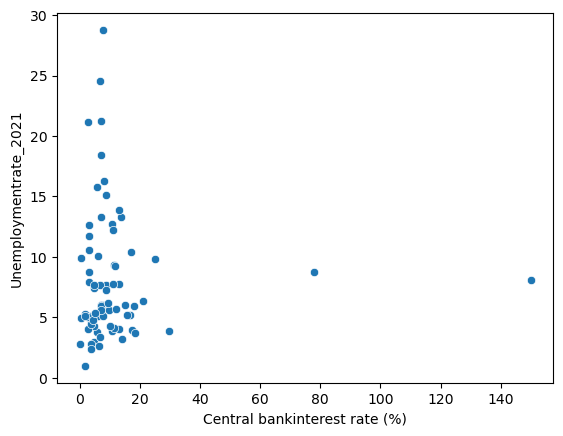

In [68]:
sns.scatterplot(x='Central bankinterest rate (%)',y='Unemploymentrate_2021',data=df_final)

<AxesSubplot:xlabel='GDP', ylabel='Unemploymentrate_2021'>

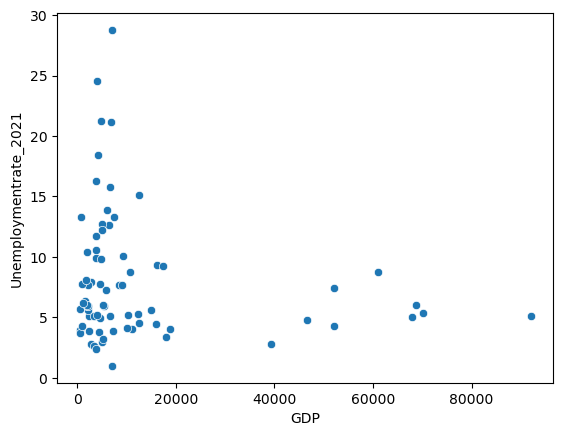

In [69]:
sns.scatterplot(x='GDP',y='Unemploymentrate_2021',data=df_final)

<AxesSubplot:xlabel='Literacy_rate_Adult', ylabel='Unemploymentrate_2021'>

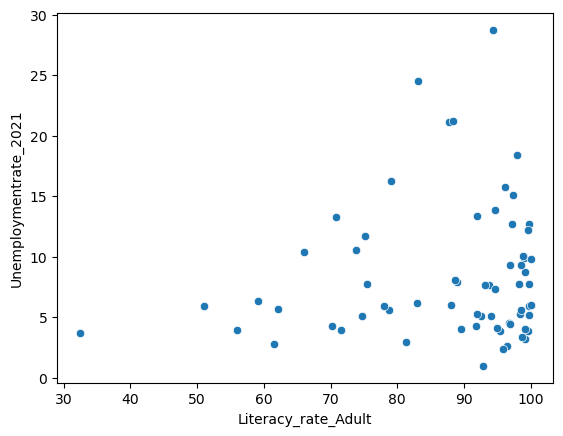

In [70]:
sns.scatterplot(x='Literacy_rate_Adult',y='Unemploymentrate_2021',data=df_final)

<AxesSubplot:xlabel='belowPovertyLine', ylabel='Unemploymentrate_2021'>

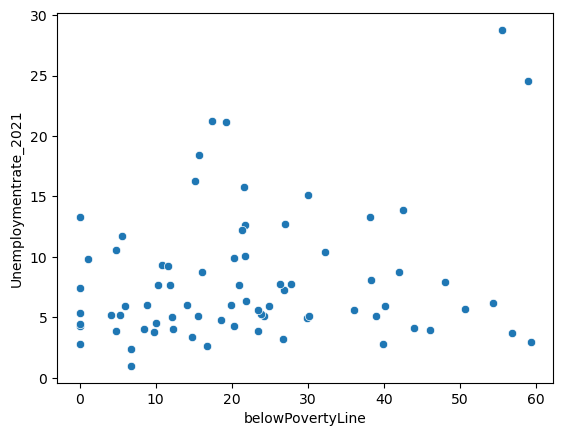

In [71]:
sns.scatterplot(x='belowPovertyLine',y='Unemploymentrate_2021',data=df_final)

<AxesSubplot:xlabel='Migrants per1,000 population', ylabel='Unemploymentrate_2021'>

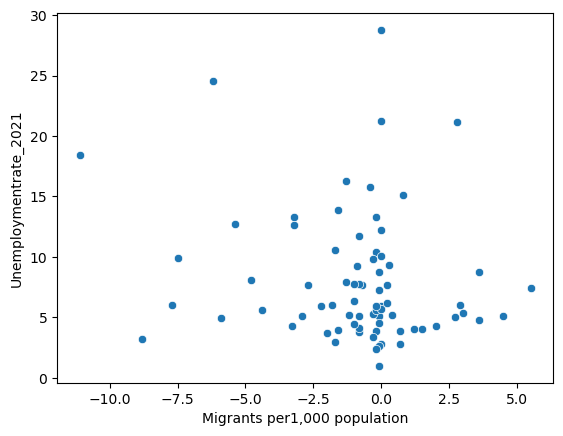

In [73]:

sns.scatterplot(x='Migrants per1,000 population',y='Unemploymentrate_2021',data=df_final)

<AxesSubplot:xlabel='Population', ylabel='Unemploymentrate_2021'>

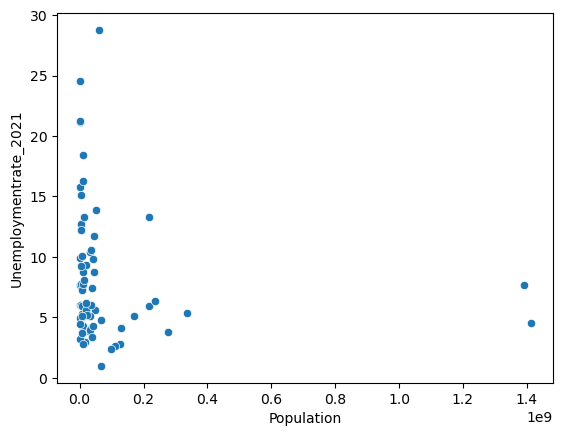

In [74]:
sns.scatterplot(x='Population',y='Unemploymentrate_2021',data=df_final)

In [ ]:
# import seaborn as sns
# import matplotlib.pyplot as plt

# # Get the list of column names in the DataFrame
# column_names = df_final.columns.tolist()

# # Remove the target variable from the list of column names
# column_names.remove('Unemploymentrate_2021')

# # Create a figure with subplots for each column
# fig, axes = plt.subplots(nrows=len(column_names), ncols=1, figsize=(10, 30))

# # Loop through each column and plot against the target variable
# for i, col in enumerate(column_names):
#     sns.scatterplot(x=col, y='Unemploymentrate_2021', data=df_final, ax=axes[i])
#     axes[i].set_xlabel(col)
#     axes[i].set_ylabel('Unemploymentrate_2021')

# # Adjust the layout of the subplots
# plt.tight_layout()
# plt.show()

## Let's look at how our explainatory variables are related

In [75]:
corr=df_final.corr()

<AxesSubplot:>

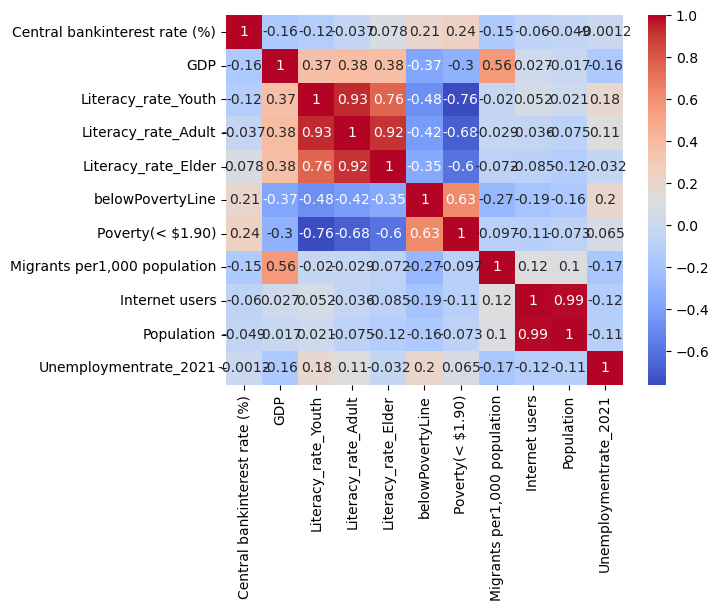

In [76]:
sns.heatmap(corr, cmap='coolwarm', annot=True)

Here we see a few things. First, most correlations are weak. The exceptions are notable: Population with Internet users, GDP with Migrants, Poverty with literacy rates, and literacy rates among themselves.

## Fill in a few points of missing data with the mean

In [77]:
col_means = df_final.mean()
df_final=df_final.fillna(col_means)

C:\Users\Jacob\AppData\Local\Temp\ipykernel_23884\2134190031.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  col_means = df_final.mean()


In [78]:
df_final.head()

,Country Name,Central bankinterest rate (%),GDP,Literacy_rate_Youth,Literacy_rate_Adult,Literacy_rate_Elder,belowPovertyLine,Poverty(< $1.90),"Migrants per1,000 population",Internet users,Population,Unemploymentrate_2021
0,Albania,3.00,6493.0,99.2,97.2,86.9,21.8,10.00,-3.2,2105339.0,2793592.0,12.683
1,Algeria,3.00,3691.0,93.8,75.1,19.5,5.5,0.32,-0.8,32090000.0,45400000.0,11.747
2,Angola,17.00,1954.0,77.4,66.0,27.0,32.3,51.40,-0.2,4271053.0,33086278.0,10.384
3,Argentina,78.00,10636.0,99.5,99.1,97.9,42.0,1.60,-0.1,33561876.0,46044703.0,8.740
4,Armenia,10.75,4967.0,99.8,99.7,98.9,27.0,0.40,-5.4,2043110.0,2976800.0,12.729


---

# Data Modeling

In [79]:
X=df_final.drop(columns=['Country Name','Unemploymentrate_2021'])

y=df_final['Unemploymentrate_2021']

## Random Forest Regression

First we try with just 100 trees

In [92]:
# Create and train the model
rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X, y)

# Perform 5-fold cross-validation
scores = cross_val_score(rf, X, y, cv=5, scoring='r2')

# Print the R2 scores for each fold
print("R2 scores:", scores)

# Print the mean and standard deviation of the scores
print("Mean R2 score:", scores.mean())
print("Standard deviation:", scores.std())

print(rf.score(X,y))

R2 scores: [ 0.31014337  0.10878677  0.26310573 -0.01954633 -0.28269962]
Mean R2 score: 0.07595798436232781
Standard deviation: 0.21386965988185716
0.8491438289157307


Then again with 300 trees

In [93]:
rf = RandomForestRegressor(n_estimators=300, random_state=42)
rf.fit(X,y)

# Perform 5-fold cross-validation
scores = cross_val_score(rf, X, y, cv=5, scoring='r2')

# Print the R2 scores for each fold
print("R2 scores:", scores)

# Print the mean and standard deviation of the scores
print("Mean R2 score:", scores.mean())
print("Standard deviation:", scores.std())
print(rf.score(X,y))

R2 scores: [ 0.28759555  0.06829748  0.19199605 -0.01823022 -0.35524746]
Mean R2 score: 0.03488228021854269
Standard deviation: 0.22121819856825764
0.8492498161751243


So when we chaged the n_estimator values here manually, we got marginally better results for 300. So it would be better to keep the smaller forest.

## Linear Regression

In [94]:
lm = LinearRegression()
lm.fit(X,y)
print(lm.score(X,y))

0.25449621188615845


In [95]:
# Perform 5-fold cross-validation
scores = cross_val_score(lm, X, y, cv=5, scoring='r2')

# Print the R2 scores for each fold
print("R2 scores:", scores)

# Print the mean and standard deviation of the scores
print("Mean R2 score:", scores.mean())
print("Standard deviation:", scores.std())

R2 scores: [ 0.01986732  0.22176022  0.01149951 -0.15947314 -1.03424196]
Mean R2 score: -0.18811761241654673
Standard deviation: 0.4399662449258246


As expected, something as complex as unemployment isn't predicted well linearly, even in higher dimensions

## Decision Tree Regression

In [96]:
# Create a Decision Tree Regressor with a maximum depth of 5
dt = DecisionTreeRegressor(max_depth=5, random_state=42)
dt.fit(X, y)
print(dt.score(X,y))

0.8238569955094329


In [97]:
# Perform 5-fold cross-validation
scores = cross_val_score(dt, X, y, cv=5, scoring='r2')

# Print the R2 scores for each fold
print("R2 scores:", scores)

# Print the mean and standard deviation of the scores
print("Mean R2 score:", scores.mean())
print("Standard deviation:", scores.std())

R2 scores: [-0.36760693 -0.01804111 -1.65520313 -1.08057054 -0.61914219]
Mean R2 score: -0.7481127786586346
Standard deviation: 0.5705723141452874


The decision tree preformed fine on seen data, but poorly on unseen data, as often is the foley of decision trees.

# Trends in Unemployment

In [99]:
Unemployment_years=pd.read_csv('data/UnemployeementRate.csv')

In [100]:
Unemployment_years=Unemployment_years[['Country Name',
       '1991', '1992', '1993', '1994', '1995', '1996', '1997', '1998', '1999',
       '2000', '2001', '2002', '2003', '2004', '2005', '2006', '2007', '2008',
       '2009', '2010', '2011', '2012', '2013', '2014', '2015', '2016', '2017',
       '2018', '2019', '2020', '2021']]


In [101]:
Unemployment_years.head()

,Country Name,1991,1992,1993,1994,1995,1996,1997,1998,1999,...,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021
0,Aruba,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Africa Eastern and Southern,7.333336,7.318747,7.242706,7.160694,7.063796,7.055998,7.090541,7.060097,7.015272,...,6.599356,6.512784,6.555645,6.707142,6.855589,6.940365,6.913046,7.121664,7.631303,7.920219
2,Afghanistan,8.121000,8.168000,8.123000,8.111000,8.260000,8.165000,8.089000,8.082000,8.070000,...,8.019000,7.949000,7.910000,8.989000,10.086000,11.180000,11.110000,11.085000,11.710000,NaN
3,Africa Western and Central,4.224595,4.335460,4.372125,4.366898,4.348996,4.379537,4.421117,4.454917,4.637773,...,4.167556,3.804448,3.985878,4.241136,4.112958,4.140484,4.201599,4.261414,4.914143,4.873635
4,Angola,4.489000,4.487000,4.531000,4.395000,4.304000,4.274000,4.262000,4.234000,4.206000,...,8.064000,8.834000,9.580000,9.584000,9.586000,9.535000,9.522000,9.481000,10.350000,10.384000


In [102]:
column_mean=Unemployment_years.mean()

C:\Users\Jacob\AppData\Local\Temp\ipykernel_23884\3013264792.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  column_mean=Unemployment_years.mean()


In [103]:
Unemployment_years=Unemployment_years.fillna(column_mean)

In [104]:
melted_df = pd.melt(Unemployment_years, id_vars=["Country Name"], var_name="Year", value_name="Unemployment Rate")


In [105]:
list_of_top10_population=df_population.iloc[1:11]['Country'].tolist()

In [106]:
list_of_top10_population

['China',
 'India',
 'United States',
 'Indonesia',
 'Pakistan',
 'Nigeria',
 'Brazil',
 'Bangladesh',
 'Russia',
 'Mexico']

In [107]:
melted_df_top=melted_df[melted_df['Country Name'].isin(list_of_top10_population)]

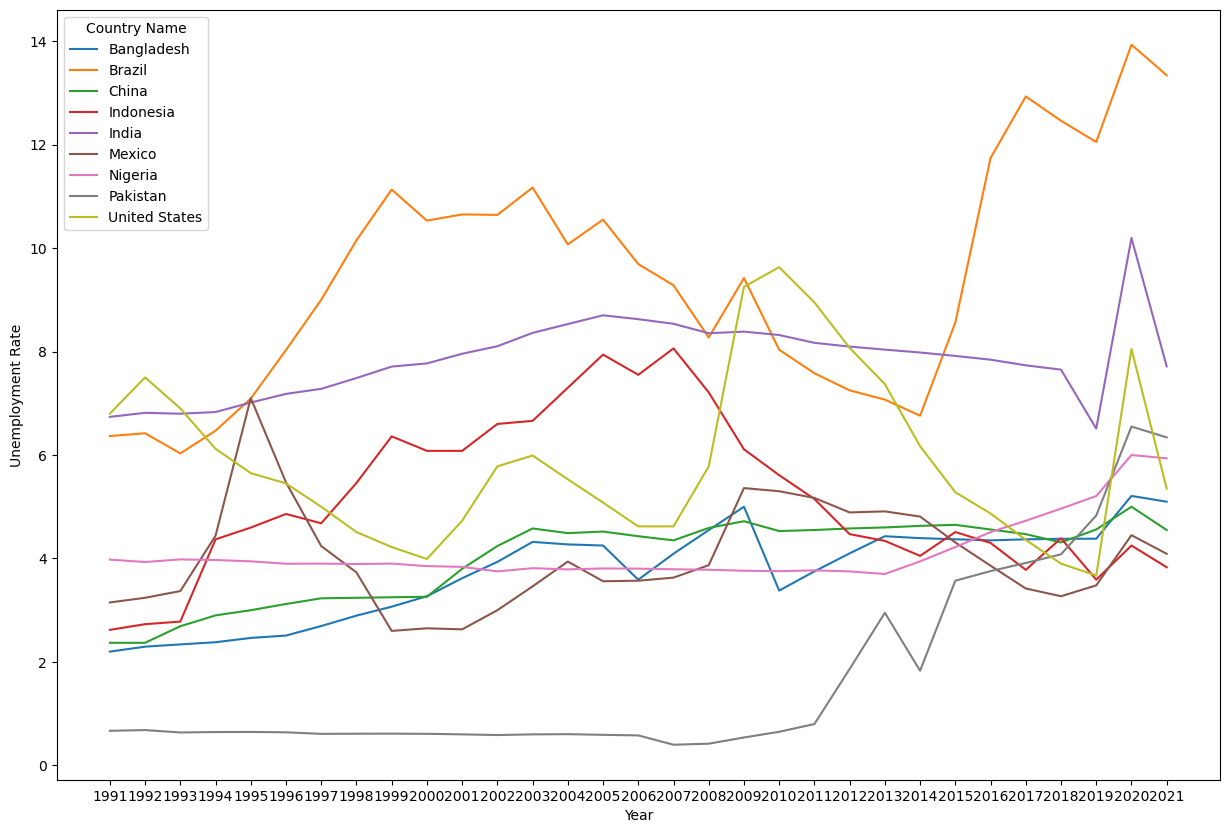

In [108]:
#population
# create the line plot using seaborn
plt.figure(figsize=(15, 10))
sns.lineplot(x='Year', y='Unemployment Rate', hue='Country Name', data=melted_df_top)

# display the plot
plt.show()


<span style='background:yellow'> Explain Mexico jump, the 2020 pandemic, and the rise in Pakistan  </span>

___

# Economic Model Explainations
Here we'll shift our focus a bit, turning to the experts on economics to help us with our predictions. We'll explore a few different models and use our data to analyze them and see what we learn!

## Walrasian Model, simplified to be univariable (real minimum wage)

In [112]:
df_unemployeement=pd.read_csv('data/Unemloyment_years.csv')

df_minWage = pd.read_csv('data/realMinWage.csv')
df_minWage = df_minWage.query('Time == 2021 and SERIES.str.startswith("PPP") and PERIOD.str.startswith("A") ')

df_minWage_vs_Unempl=pd.merge(df_minWage,df_unemployeement,left_on='COUNTRY',right_on='Country Code',how='inner')

[-0.16237268] 0.08641052510209457


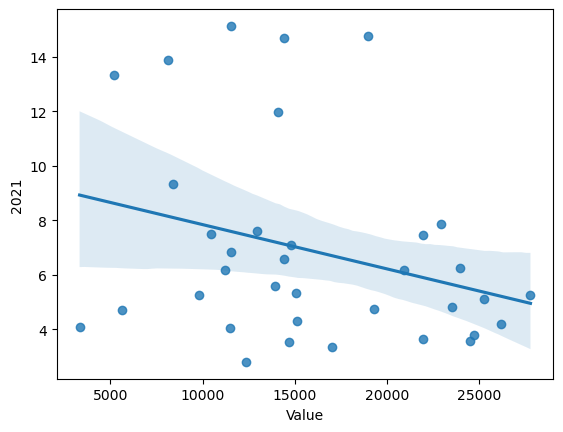

In [112]:
sns.regplot(x='Value',y='2021',data=df_minWage_vs_Unempl)

X = df_minWage_vs_Unempl[['Value']]
Y = df_minWage_vs_Unempl['2021']
lm = LinearRegression()
lm.fit(X,Y)
print(lm.coef_*1000,lm.score(X,Y))

This model didn't do too well as expected, even by the econmoists. They say it's too simple becasue we're assuming everyone get paid the minimum wage uniformly.

# Walrasian Model, multivariate (labor skill and minimum wage)
A more complex Walrasian model takes partially into account the effect of skilled and unskilled labor differences, so we'll explore that next. We'll analyze each one seperately, then together

In [116]:
df_all = pd.read_csv('data/everything.csv')

C:\Users\Jacob\AppData\Local\Temp\ipykernel_23884\2945327670.py:1: DtypeWarning: Columns (15,16) have mixed types. Specify dtype option on import or set low_memory=False.
  df_all = pd.read_csv('data/everything.csv')


## How does low skilled work connect with unemployment?

[0.17287678] 0.11755597601920909


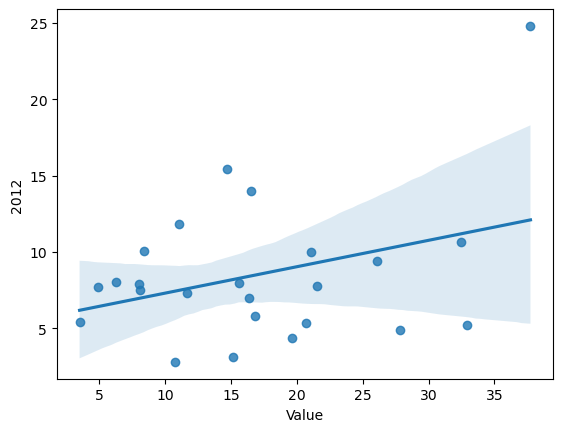

In [118]:
df_low = df_all.query('Variable.str.startswith("Job requirements; low qualification") and Sex.str.startswith("T")')
df_low_vs_Unempl=pd.merge(df_low,df_unemployeement,left_on='LOCATION',right_on='Country Code',how='inner')
sns.regplot(x='Value',y='2012',data=df_low_vs_Unempl)

X = df_low_vs_Unempl[['Value']]
Y = df_low_vs_Unempl['2012']
lm = LinearRegression()
lm.fit(X,Y)
print(lm.coef_,lm.score(X,Y))

## How does medium skilled work connect with unemployment?

[-0.11233564] 0.07191704344920491


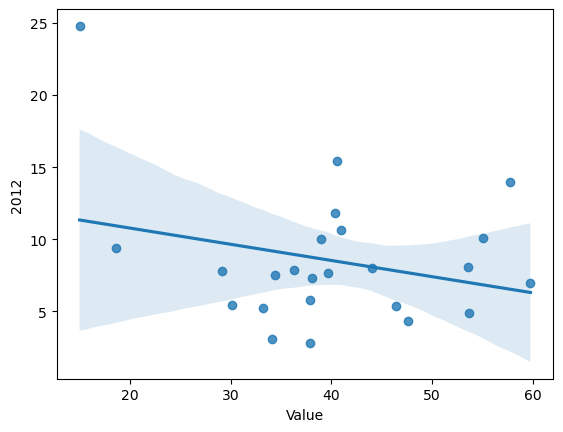

In [119]:
df_med = df_all.query('Variable.str.startswith("Job requirements; medium qualification") and Sex.str.startswith("T")')
df_med_vs_Unempl=pd.merge(df_med,df_unemployeement,left_on='LOCATION',right_on='Country Code',how='inner')
sns.regplot(x='Value',y='2012',data=df_med_vs_Unempl)

X = df_med_vs_Unempl[['Value']]
Y = df_med_vs_Unempl['2012']
lm = LinearRegression()
lm.fit(X,Y)
print(lm.coef_,lm.score(X,Y))

## How does high skilled work connect with unemployment?

[-0.03805309] 0.005336410787900481


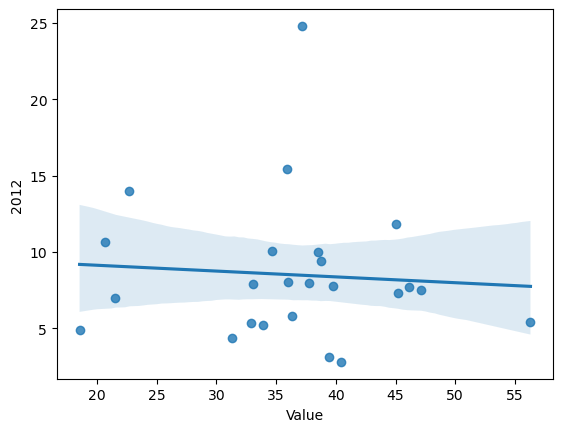

In [120]:
df_high = df_all.query('Variable.str.startswith("Job requirements; high qualification") and Sex.str.startswith("T")')
df_high_vs_Unempl=pd.merge(df_high,df_unemployeement,left_on='LOCATION',right_on='Country Code',how='inner')
sns.regplot(x='Value',y='2012',data=df_high_vs_Unempl)

X = df_high_vs_Unempl[['Value']]
Y = df_high_vs_Unempl['2012']
lm = LinearRegression()
lm.fit(X,Y)
print(lm.coef_,lm.score(X,Y))

It doesn't appear as if the skill of a labor market seems to affect the unemployment rate.

## Combined multivariate exploration

In [123]:
df_high = df_high.rename(columns={"Value": "highSkill"})
df_med = df_med.rename(columns={"Value": "medSkill"})
df_low = df_low.rename(columns={"Value": "lowSkill"})

df_skill = pd.merge(df_high,df_med,left_on='LOCATION',right_on='LOCATION',how='inner')
df_skill = pd.merge(df_skill,df_low,left_on='LOCATION',right_on='LOCATION',how='inner')
df_skill = pd.merge(df_skill,df_minWage,left_on='LOCATION',right_on='COUNTRY',how='inner')
df_skill = pd.merge(df_skill,df_unemployeement,left_on='LOCATION',right_on='Country Code',how='inner')

C:\Users\Jacob\AppData\Local\Temp\ipykernel_23884\1714108792.py:7: FutureWarning: Passing 'suffixes' which cause duplicate columns {'TIME_x', 'Unit Code_x', 'Flag Codes_x', 'Reference Period Code_x', 'PowerCode Code_x', 'Unit_x', 'Country_x', 'Reference Period_x', 'PowerCode_x', 'Flags_x'} in the result is deprecated and will raise a MergeError in a future version.
  df_skill = pd.merge(df_skill,df_minWage,left_on='LOCATION',right_on='COUNTRY',how='inner')


### Linear Regression

In [125]:
X = df_skill[['highSkill','medSkill','lowSkill','Value']]
Y = df_skill['2012']
lm = LinearRegression()
lm.fit(X,Y)
print(lm.score(X,Y))

0.40127618737609205


In [126]:
# Perform 5-fold cross-validation
scores = cross_val_score(lm, X, Y, cv=5, scoring='r2')

# Print the R2 scores for each fold
print("R2 scores:", scores)

# Print the mean and standard deviation of the scores
print("Mean R2 score:", scores.mean())

R2 scores: [-57.82888734  -0.5322766   -0.75337599  -1.02190173 -55.77829039]
Mean R2 score: -23.182946410487695


Again, we see that linear regression doesn't fit the data well, amd has even poorer perfomance on unseen data

### Random Forest Regressor

In [152]:
# Create and train the model
rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X, Y)

print(rf.score(X,Y))

0.8474109640136878


In [155]:
# Create a Random Forest Regressor with 100 trees
rf = RandomForestRegressor(n_estimators=100, random_state=42)

# Perform 5-fold cross-validation
scores = cross_val_score(rf, X, Y, cv=5, scoring='r2')

# Print the R2 scores for each fold
print("R2 scores:", scores)

# Print the mean and standard deviation of the scores
print("Mean R2 score:", scores.mean())
rf.fit(X, Y)
print(rf.score(X,Y))

R2 scores: [-24.35528456  -0.90610589  -0.28575247  -0.72616798  -4.62624823]
Mean R2 score: -6.179911826278847
0.8474109640136878


Even higher dimensional prediction performs about as well as linear regession does.

## ARIMA model to predict 2021 unemployment Rate

In [129]:
# Set the index to be the year column
Unemployment_years.set_index('Country Name', inplace=True)


In [147]:
def ARIMA_model(country):
    country_data = Unemployment_years.loc[country]
    #Split the data into training and testing sets
    train_data = country_data.iloc[:int(len(country_data)*0.98)]
    test_data = country_data.iloc[int(len(country_data)*0.98):]
    # Fit the ARIMA model
    model = ARIMA(train_data, order=(2, 1, 2))
    model_fit = model.fit()
    # Make predictions on the testing set
    predictions = model_fit.forecast(steps=len(test_data))
    mse = mean_squared_error(test_data, predictions)
    return mse


In [145]:
Country_list=Unemployment_years.index.tolist()

In [146]:
ARIMA_model('India')

ValueError: The given frequency argument could not be matched to the given index.

In [ ]:
# Country_list=[x for x in Country_list if str(x) != 'NaN']

In [149]:
mse_values=[]
for country in Country_list:
    mse_values.append(ARIMA_model(country))

C:\Users\Jacob\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  self._init_dates(dates, freq)
C:\Users\Jacob\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  self._init_dates(dates, freq)
C:\Users\Jacob\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  self._init_dates(dates, freq)
C:\Users\Jacob\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
C:\Users\Jacob\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, s

In [150]:
average_mse=sum(mse_values)/len(mse_values)

In [151]:
average_mse

2.018256167678359